# **PROJECT - (19th Feb, 2021 - 5th Mar, 2021)**


In [3]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Set the appropriate path for the Project

path = "/content/drive/MyDrive/My Files/AIML Workbooks/"

In [5]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [41]:
import os                   # Importing os library
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
from glob import glob       # Importing necessary library
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA           # Importing to run pca analysis on data
from sklearn import svm              # Importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn.neighbors import KNeighborsClassifier         # Importing necessary library for model building  
from sklearn import preprocessing               # Importing preprocessing library 

from sklearn.model_selection import KFold, cross_val_score           # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV           # Importing for hypertuning model
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.stats import zscore       # Import zscore library
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
import tensorflow           # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model             # Importing tensorflow library
from tensorflow.keras.utils import to_categorical          # Importing tensorflow library
from tensorflow.keras import optimizers                    # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten      # Importing necessary libraries 
from keras.utils import np_utils     # Importing necessary library
from sklearn import svm              # Importing necessary library for model building
from sklearn.svm import SVC          # Import svc library for model building

from skimage.color import rgb2gray              # Loading color library
from sklearn.preprocessing import OneHotEncoder            # Library for one hot encoding
from sklearn.metrics import confusion_matrix               # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array            # Loading image generator 
from keras.preprocessing import image           # Importing necessary image library
from tensorflow import keras         # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD          # Importing optimizer library
import cv2                  # Importing necessary library
from PIL import ImageFile            # Importing image library
from tqdm import tqdm                # Importing necessary library
import time                 # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid              # Importing necessary image library
from PIL import Image       # Importing image library

# **I]. PART ONE // PLANT SPECIES**

### **1. Import the data. Analyse the dimensions of the data. Visualise the data.**

# **Data Exploration**

In [7]:
train_dir = '/content/drive/MyDrive/My Files/AIML Workbooks/plant-seedlings-classification/train'
test_dir = '/content/drive/MyDrive/My Files/AIML Workbooks/plant-seedlings-classification/test'

In [8]:
train_images = []
train_labels = []
plant_train_unique_labels = []
for label_folder_name in os.listdir(train_dir):
  label_path = os.path.join(train_dir, label_folder_name)

  for image_path in glob(os.path.join(label_path, '*.png')):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None: # ignore if any file contains any missing value
      missing += 1
      continue
    train_images.append(image)

    train_labels.append(label_folder_name)

  plant_train_unique_labels.append(label_folder_name)

In [9]:
# Number of images in training set
print("Number of images in training set:", len(train_images))

# Number of labels in training set
print("Number of Unique labels:", len(plant_train_unique_labels))

Number of images in training set: 4750
Number of Unique labels: 12


In [10]:
# Resizing the images of train data set
train_images = [cv2.resize(img, (256, 256)) for img in train_images]  

print("The shape of the train images after resizing is:", train_images[0].shape)

The shape of the train images after resizing is: (256, 256, 3)


In [11]:
# Number of images in each class
train_images = np.array(train_images)
train_labels = np.array(train_labels)
for label in set(train_labels):
  print("Number of {} images is : {}".format(label, len(train_images[train_labels == label])))

Number of Cleavers images is : 287
Number of Maize images is : 221
Number of Charlock images is : 390
Number of Loose Silky-bent images is : 654
Number of Common Chickweed images is : 611
Number of Scentless Mayweed images is : 516
Number of Sugar beet images is : 385
Number of Shepherds Purse images is : 231
Number of Common wheat images is : 221
Number of Small-flowered Cranesbill images is : 496
Number of Fat Hen images is : 475
Number of Black-grass images is : 263


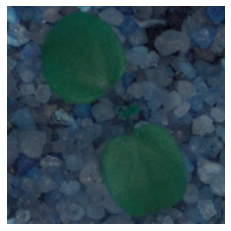

Label of the Plant is: Cleavers


In [12]:
# Plot the sample image
plt.imshow(train_images[12])
plt.axis("off")
plt.show()
print("Label of the Plant is:", train_labels[12])

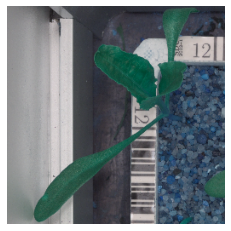

Label of the Plant is: Sugar beet


In [13]:
# Plot the sample image
plt.imshow(train_images[550])
plt.axis("off")
plt.show()
print("Label of the Plant is:", train_labels[550])

In [21]:
# Encode the labels to binary format using Label Binarizer

from sklearn.preprocessing import LabelBinarizer

encod_labels = LabelBinarizer()
y_plt = encod_labels.fit_transform(train_labels)
y_plt[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
 # Converting an numpy array into a pandas dataframe
df_labels = pd.DataFrame(y_plt, columns = encod_labels.classes_)

# Viewing few rows of data
df_labels

Black-grass  Charlock  ...  Small-flowered Cranesbill  Sugar beet
0               0         0  ...                          0           0
1               0         0  ...                          0           0
2               0         0  ...                          0           0
3               0         0  ...                          0           0
4               0         0  ...                          0           0
...           ...       ...  ...                        ...         ...
4745            0         0  ...                          0           0
4746            0         0  ...                          0           0
4747            0         0  ...                          0           0
4748            0         0  ...                          0           0
4749            0         0  ...                          0           0

[4750 rows x 12 columns]

In [23]:
# Splitting data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(train_images, y_plt, test_size = 0.2, random_state = 50)

In [24]:
# Shape of Training Set of images
X_train.shape

(3800, 256, 256, 3)

In [25]:
# Splitting test data into test and validation data

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 2)

In [26]:
print("Shape of Test Set of images", X_test.shape)
print("Shape of Validation Set of images", X_val.shape)

Shape of Test Set of images (475, 256, 256, 3)
Shape of Validation Set of images (475, 256, 256, 3)


## **Supervised Learning Model Building**

In [30]:
# Building the base model feature extractor using CNN

base_mod = Sequential()

# Add a convolution layer with 64 Kernels of 3x3 shape
base_mod.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", input_shape = X_train.shape[1:]))
# Adding Max Pooling layer
base_mod.add(MaxPooling2D(pool_size = (2, 2)))
# Add Drop out of 0.2
base_mod.add(Dropout(0.2))


# Add a convolution layer with 128 Kernels of 3x3 shape
base_mod.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
# Adding Max Pooling layer
base_mod.add(MaxPooling2D(pool_size = (2, 2)))
# Add Drop out of 0.4
base_mod.add(Dropout(0.4))


# Add a convolution layer with 256 Kernels of 3x3 shape
base_mod.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"))
# Adding Max Pooling layer
base_mod.add(MaxPooling2D(pool_size = (2, 2)))
# Add Drop out of 0.6
base_mod.add(Dropout(0.6))

# Add a Flatten layer
base_mod.add(Flatten())
# Add a fully connected layer
base_mod.add(Dense(256, activation='relu'))
# Add Drop out of 0.8
base_mod.add(Dropout(0.8))

# Output Layer
base_mod.add(Dense(12, activation = "softmax"))
base_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       2

In [31]:
# Get the features from Basic CNN
model_final = Model(inputs = base_mod.input, outputs = base_mod.get_layer("dense_1").output)
train = model_final.predict(X_train)
test  = model_final.predict(X_test)

## **SVC Model Building**

In [39]:
svc_model = SVC(C = 3, kernel = "rbf", gamma = 0.10)

# Fit the SVC model 
svc_model.fit(train, np.argmax(y_train, axis = 1) )

# Determine the accuracy score of the SVC model
svc_acc = svc_model.score(test, np.argmax(y_test, axis = 1))

In [85]:
# Store the accuracy results for each model in a dataframe for final comparison

plant_res = pd.DataFrame({"Method":["SVC"], "Accuracy":round((svc_acc * 100), 2)}, index = {"1"})
plant_res = plant_res[["Method", "Accuracy"]]
plant_res

Method  Accuracy
1    SVC     13.89

## **KNN Model Building**

In [43]:
knn_model = KNeighborsClassifier(n_neighbors = 12)

# Fit the KNN model 
knn_model.fit(train, np.argmax(y_train, axis = 1) )

# Determine the accuracy score of the KNN model
knn_acc = knn_model.score(test, np.argmax(y_test, axis = 1))

In [86]:
# Store the accuracy results for each model in a dataframe for final comparison
Results_Df = pd.DataFrame({"Method":["KNN"], "Accuracy":round((knn_acc * 100), 2)}, index = {"2"})
plant_res = pd.concat([plant_res, Results_Df])
plant_res = plant_res[["Method", "Accuracy"]]
plant_res

Method  Accuracy
1    SVC     13.89
2    KNN     12.42

## **Neural Network Model Building**

In [51]:
# Initialize Sequential model

mod_nn = Sequential()

# Input Layer

mod_nn.add(Dense(128, kernel_initializer = 'normal', activation = 'relu', input_shape = X_train.shape[1:]))
mod_nn.add(Dropout(0.3))    # Adding dropout 0.3

# Adding two Hidden layers
mod_nn.add(Dense(100, activation='relu', kernel_initializer = 'normal'))    # 2nd layer
mod_nn.add(Dropout(0.2))    # Adding dropout 0.2
mod_nn.add(Dense(64, activation='relu', kernel_initializer = 'normal'))    # 3rd layer
mod_nn.add(Dropout(0.3))    # Adding dropout 0.3
mod_nn.add(Dense(32, activation='relu', kernel_initializer = 'normal'))    # 4th layer
mod_nn.add(Dropout(0.3))    # Adding dropout 0.2

# Flattening layer
mod_nn.add(Flatten())       

#Output layer
mod_nn.add(Dense(12, activation='softmax', kernel_initializer = 'normal'))

# Adding SGD optimizer
sgd_opt = optimizers.SGD(lr = 0.001)
mod_nn.compile(optimizer = sgd_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
# Fit the model

callbk = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2, min_delta = 0.001)

mod_nn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 50, verbose = 1, callbacks = [callbk])

# Getting accuracy
ann_acc = mod_nn.evaluate(X_test, y_test)

Epoch 1/50
119/119 [==============================] - 65s 548ms/step - loss: 2.4566 - accuracy: 0.1153 - val_loss: 2.4355 - val_accuracy: 0.1726
Epoch 2/50
119/119 [==============================] - 65s 547ms/step - loss: 2.4491 - accuracy: 0.1189 - val_loss: 2.4337 - val_accuracy: 0.2063
Epoch 3/50
119/119 [==============================] - 65s 547ms/step - loss: 2.4422 - accuracy: 0.1189 - val_loss: 2.4180 - val_accuracy: 0.1958
Epoch 4/50
15/15 [==============================] - 2s 153ms/step - loss: 2.4074 - accuracy: 0.1684


In [87]:
# Store the accuracy results for each model in a dataframe for final comparison

Results_Df = pd.DataFrame({"Method":["NN"], "Accuracy":round((ann_acc[1] * 100), 2)}, index = {"3"})
plant_res = pd.concat([plant_res, Results_Df])
plant_res = plant_res[["Method", "Accuracy"]]
plant_res

Method  Accuracy
1    SVC     13.89
2    KNN     12.42
3     NN     16.84

## **CNN Model Building**

In [80]:
# Initializing the CNN classifier
cnn = Sequential()

cnn.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = X_train.shape[1:]))   # Adding convolutional layer with 64 kernels of size 3x3
cnn.add(MaxPooling2D((2, 2), padding = 'same'))     # Adding maxpooling layer 
cnn.add(BatchNormalization())      # Adding batch normalization

cnn.add(Conv2D(filters = 512, kernel_size = (4,4), padding = 'same', activation = 'relu'))      # Adding convolutional layer with 128 kernels of size 3x3
cnn.add(MaxPooling2D((3, 3), padding = 'same'))     # Adding maxpooling layer
cnn.add(BatchNormalization())      # Adding batch normalization
cnn.add(Dropout(0.1))        # Adding dropout of 0.1

cnn.add(Conv2D(filters = 256, kernel_size = (4,4), padding = 'same', activation = 'relu'))      # Adding convolutional layer with 256 kernels of size 3x3
cnn.add(MaxPooling2D((2, 2), padding = 'same'))     # Adding maxpooling layer
cnn.add(BatchNormalization())      # Adding batch normalization

cnn.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3x3
cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
cnn.add(BatchNormalization())      # Adding batch normalization
cnn.add(Dropout(0.1))        # Adding dropout of 0.1

cnn.add(Conv2D(filters = 100, kernel_size = (2,2), padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3x3
cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
cnn.add(BatchNormalization())      # Adding batch normalization

cnn.add(Conv2D(filters = 64, kernel_size = (2,2), padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3x3
cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
cnn.add(BatchNormalization())      # Adding batch normalization
cnn.add(Dropout(0.1))        # Adding dropout of 0.1

cnn.add(Flatten())     # Adding flattening layer
cnn.add(Dense(100, activation = 'relu'))        # Adding fully connected layer
cnn.add(BatchNormalization())      # Adding batch normalization
cnn.add(Dropout(0.1))        # Adding dropout 0.1
cnn.add(Dense(50, activation = 'relu'))         # Adding fully connected layer
cnn.add(BatchNormalization())      # Adding batch normalization
cnn.add(Dropout(0.1))        # Adding dropout 0.1

cnn.add(Dense(12, activation = 'softmax'))      # Output layer

In [81]:
# Compiling the model

cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [82]:
# Fitting the model

callbck = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2, min_delta = 0.001)

cnn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 20, epochs = 50, callbacks = [callbck])

Epoch 1/50
190/190 [==============================] - 102s 529ms/step - loss: 2.3893 - accuracy: 0.2645 - val_loss: 2.0516 - val_accuracy: 0.3811
Epoch 2/50
190/190 [==============================] - 99s 523ms/step - loss: 1.3012 - accuracy: 0.5674 - val_loss: 1.1827 - val_accuracy: 0.5832
Epoch 3/50
190/190 [==============================] - 99s 522ms/step - loss: 0.9749 - accuracy: 0.6794 - val_loss: 1.1690 - val_accuracy: 0.6105
Epoch 4/50
190/190 [==============================] - 99s 522ms/step - loss: 0.7509 - accuracy: 0.7471 - val_loss: 0.6903 - val_accuracy: 0.7726
Epoch 5/50
190/190 [==============================] - 99s 523ms/step - loss: 0.6414 - accuracy: 0.7893 - val_loss: 1.0036 - val_accuracy: 0.6758
Epoch 6/50
190/190 [==============================] - 99s 522ms/step - loss: 0.5474 - accuracy: 0.8166 - val_loss: 0.5653 - val_accuracy: 0.8105
Epoch 7/50
190/190 [==============================] - 99s 522ms/step - loss: 0.5215 - accuracy: 0.8263 - val_loss: 1.5078 - val_a

In [88]:
cnn_accu = cnn.evaluate(X_test, y_test, verbose = 1, batch_size = 32)

# Store the accuracy results for each model in a dataframe for final comparison
Results_Df = pd.DataFrame({"Method":["CNN"], "Accuracy":(cnn_accu[1] * 100)}, index = {"4"})
plant_res = pd.concat([plant_res, Results_Df])
plant_res = plant_res[["Method", "Accuracy"]]
plant_res

15/15 [==============================] - 2s 156ms/step - loss: 0.8899 - accuracy: 0.6653


Method   Accuracy
1    SVC  13.890000
2    KNN  12.420000
3     NN  16.840000
4    CNN  66.526318

Upon comparing the Supervised Learning, Artificial Neural Network (ANN), and Convolutional Neural Networks (CNN). We see that the CNN model has given higher test accuracy of 66.52%.

## **The best performing model among all the models is CNN.**

In [89]:
# Save the CNN Model and its weights after training
cnn.save(path+"Plant Classifier.h5")
cnn.save_weights(path+"Plant Classifier weights.h5")

In [90]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
pretrained_model = load_model(path+"Plant Classifier.h5")
pretrained_model.load_weights(path+"Plant Classifier weights.h5")

### **5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.**

(256, 256, 3)
After expand_dims: (1, 256, 256, 3)


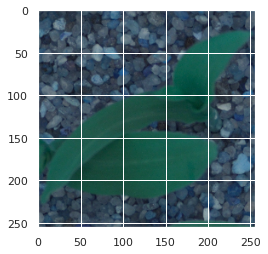

In [91]:
# Testing the model on a test image from one of the test folders
test_image = cv2.imread(path+"Predict.png")
 
# Resize the image to 256x256 shape to be compatible with the model
test_image = cv2.resize(test_image, (256, 256))
 
# Display the test image 
plt.imshow(test_image)
 
# check if the size of the image array is compatible with the model
print(test_image.shape)
 
# If not compatible expand the dimensions to match with the model
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image * 1/255.
 
# Check the size of the image again
print("After expand_dims: " + str(test_image.shape))
 
result = pretrained_model.predict(test_image)

In [92]:
print("Predicted plant is: ", df_labels.columns[np.argmax(result)])

Predicted plant is:  Loose Silky-bent


# **II]. PART TWO // PLANT SPECIES**

- Neural Networks (NN), or more precisely Artificial Neural Networks (ANN), is a class of Machine Learning algorithms that recently received a lot of recognition again, due to the availability of Big Data and fast computing facilities (most of Deep Learning algorithms are essentially different variations of ANN).

- The class of ANN covers several architectures including Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN). Therefore, CNN is just one kind of ANN.

- Generally speaking, an ANN is a collection of connected and tunable units (aka - nodes, neurons, and artificial neurons) which can pass a signal (usually a real-valued number) from a unit to another. The number of (layers of) units, their types, and the way they are connected to each other is called the network architecture.

- A CNN, in specific, has one or more layers of convolution units. A convolution unit receives its input from multiple units from the previous layer which together create a proximity. Therefore, the input units (that form a small neighborhood) share their weights.

The convolution units (as well as pooling units) are especially beneficial as:

- They reduce the number of units in the network (since they are many-to-one mappings). This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex than a fully connected network.
They consider the context/shared information in the small neighborhoods. This future is very important in many applications such as image, video, text, and speech processing/mining as the neighboring inputs (eg pixels, frames, words, etc) usually carry related information.

# **III]. PART THREE // AUTOMOBILE**

In [ ]:
import os                   # Importing os library
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
from glob import glob       # Importing necessary library
%matplotlib inline
sns.set(color_codes = True)

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading saved images path

images_path = '/content/drive/MyDrive/My Files/AIML Workbooks/Image labels/images'

In [ ]:
# Loading csv file created manually with data info from images 

carlab = pd.read_csv('/content/drive/MyDrive/My Files/AIML Workbooks/Image labels/Automobile.csv')
carlab.head()

Image Color       Model     Type
0  00001.jpg  White       Audi   Sports
1  00002.jpg  Black      Acura   Sedan 
2  00003.jpg    Red  Dodge Ram  Trailer
3  00004.jpg    Red    Hyundai   Sedan 
4  00005.jpg  White       Ford  Trailer

In [ ]:
# Reading total number of images available in the dataset

print('Total Number Of Images In Dataset :', len(carlab))

Total Number Of Images In Dataset : 15


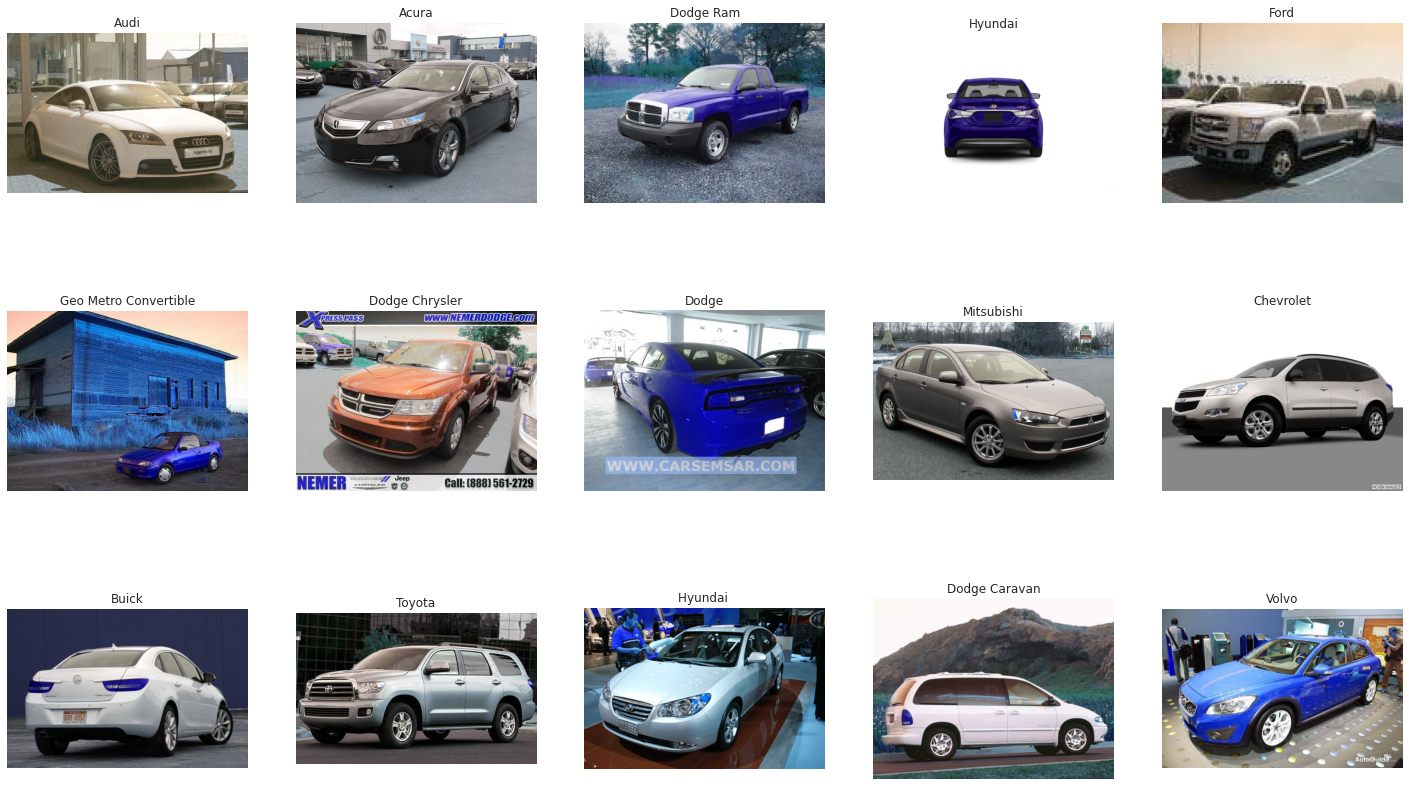

In [ ]:
# Displaying images with their labels

rows = 3
columns = 5

fig = plt.figure(figsize = (25,15))

for i in range(len(carlab)):
  fig.add_subplot(rows, columns, i+1)
  plt.title(carlab['Model'][i])
  plt.axis('off')
  output = cv2.imread('./drive/MyDrive/My Files/AIML Workbooks/Image labels/images/' + carlab['Image'][i])
  plt.imshow(output)
plt.show()

Challenges faced :
1.  Going about understanding how to creating an image dataset from scratch.

2. Building the dataset first as a csv file and then using both the csv file and image dataset to create an image classifier dataset.

3. Analysing the path to read and combine both csv file and image dataset.

4. Understanding and decoding car brand names from images provided as sizes and image qualities differ.

# **IV]. PART FOUR // FLOWERS**

In [4]:
!pip install tflearn

     |████████████████████████████████| 112kB 8.1MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=718f17d810fe5faf6db9babfbdf6a4a877677f974cf28fb579456d9426e09589
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [5]:
import os                   # Importing os library
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
from glob import glob       # Importing necessary library
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA           # Importing to run pca analysis on data
from sklearn import svm              # Importing necessary library for model building
from sklearn.svm import SVC          # Import svc library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn import preprocessing               # Importing preprocessing library 

from sklearn.neighbors import KNeighborsClassifier         # Importing library for model building
from sklearn.model_selection import KFold, cross_val_score           # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV           # Importing for hypertuning model
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.stats import zscore       # Import zscore library
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
import tensorflow           # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model      # Importing tensorflow library
from tensorflow.keras.utils import to_categorical          # Importing tensorflow library
from tensorflow.keras import optimizers                    # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten      # Importing necessary libraries 
from keras.utils import np_utils     # Importing necessary library

from skimage.color import rgb2gray              # Loading color library
from sklearn.preprocessing import OneHotEncoder            # Library for one hot encoding
from sklearn.metrics import confusion_matrix               # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array            # Loading image generator 
from keras.preprocessing import image           # Importing necessary image library
from tensorflow import keras         # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD          # Importing optimizer library
import cv2                  # Importing necessary library
from PIL import ImageFile            # Importing image library
from tqdm import tqdm                # Importing necessary library
import time                 # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid              # Importing necessary image library
from PIL import Image       # Importing image library

In [6]:
# Import the data set from tflearn

import tflearn.datasets.oxflower17 as flower17
x, y = flower17.load_data(one_hot = True)

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [7]:
# Shape of x

x.shape

(1360, 224, 224, 3)

In [8]:
# Shape of y

y.shape

(1360, 17)

- We can observe there are 1360 images each of which with height and width as 224.

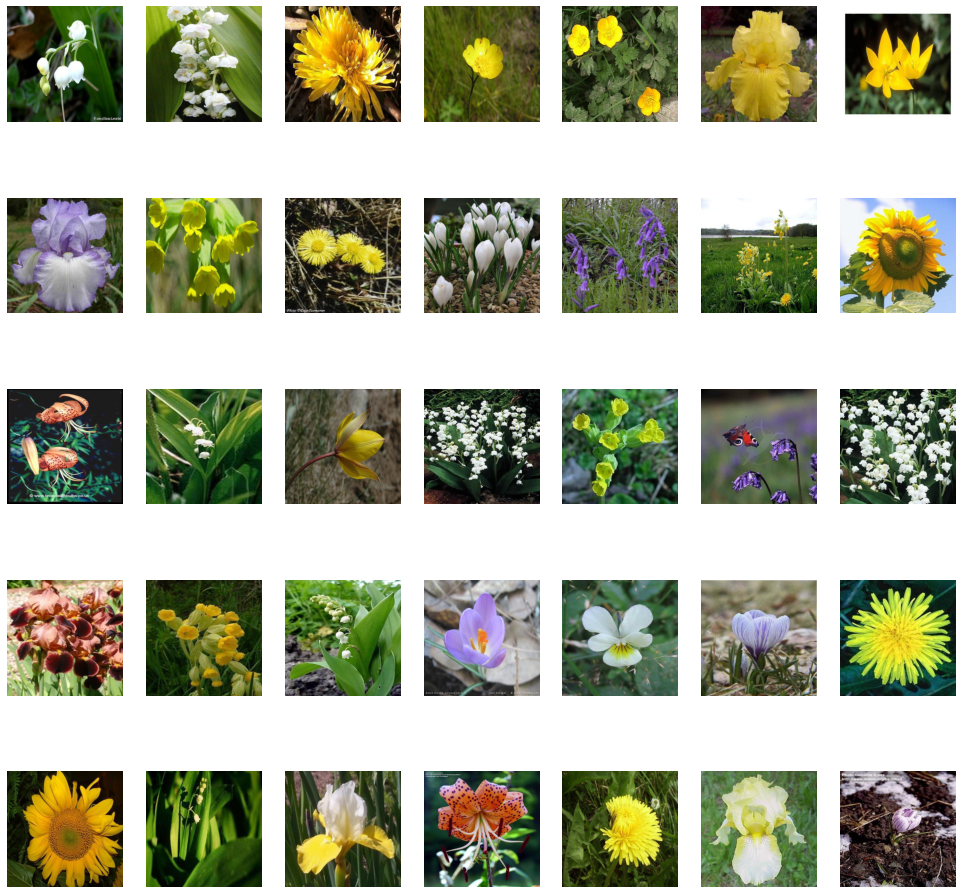

In [9]:
# Displaying and visualizing images in the dataset

plt.figure(figsize = (17, 17))
for i in range(35):
  plt.subplot(5, 7, i+1)
  plt.axis("off")
  plt.imshow(x[i])

plt.show()

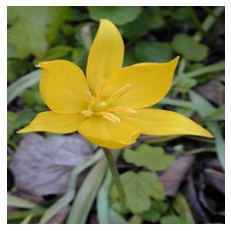

Label of Flower 150: 14


In [18]:
# Displaying specific image against its label

image = x[150]
plt.imshow(image)
plt.axis('off')
plt.show()

print("Label of Flower 150:", np.argmax(y[150]))

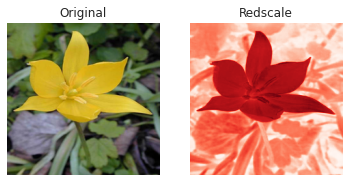

In [19]:
# Displaying and visualizing the image in redscale

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(image[:, :, 0], cmap = 'Reds')
plt.title("Redscale")
plt.axis('off')
plt.show()

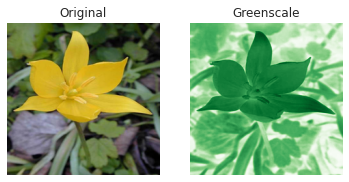

In [20]:
# Display and visualizing the image in greenscale

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(image[:, :, 1], cmap = 'Greens')
plt.title("Greenscale")
plt.axis('off')
plt.show()

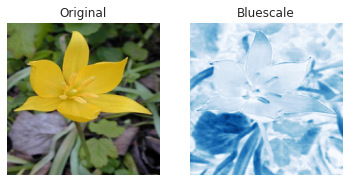

In [21]:
# Display & visualizing the image in Bluescale

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(image[:, :, 2], cmap = 'Blues')
plt.title("Bluescale")
plt.axis('off')
plt.show()

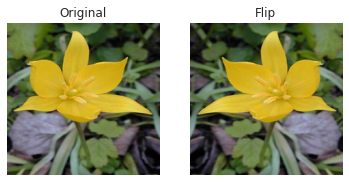

In [22]:
# Applying flip filter to the image

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

img = cv2.flip(x[150],1)
plt.subplot(122)
plt.imshow(img)
plt.title("Flip")
plt.axis('off')
plt.show()

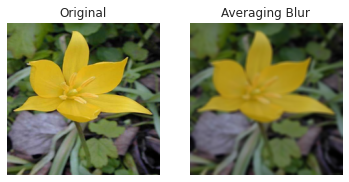

In [23]:
# Displaying and visualizing bluring effect to the image

df = np.ones((5,5), np.float32)/30
img = cv2.filter2D(image, -1, df)

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(img)
plt.title("Averaging Blur")
plt.axis('off')

plt.show()

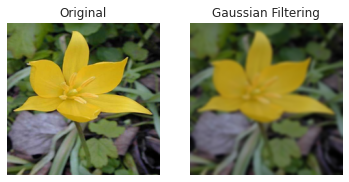

In [24]:
# Displaying and visualizing Gaussian bluring effect on the image

img = cv2.GaussianBlur(img, (5, 5), 1)

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(img)
plt.title("Gaussian Filtering")
plt.axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


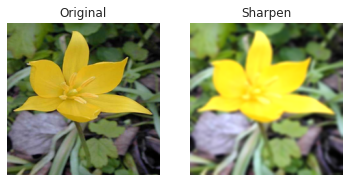

In [25]:
# Displaying and visualizing sharpen filter on the image

df = np.array(([[0, -1, 0], [-1, 9, -1], [ 0, -1, 0]]), np.float32)/3
img = cv2.filter2D(img, -1, df)

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(img)
plt.title("Sharpen")
plt.axis('off')

plt.show()

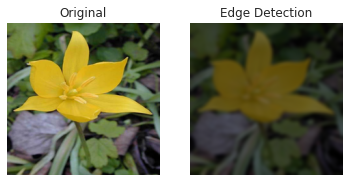

In [26]:
# Displaying and visualizing image using edge detection filter

df = np.array(([[0, 1, 0], [1, -3, 1], [ 0, 1, 0]]), np.float32)/3
img = cv2.filter2D(img, -1, df)

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(img)
plt.title("Edge Detection")
plt.axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


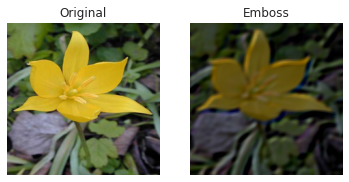

In [27]:
# Displaying and visualizing image using emboss filter

df = np.array(([[-2, -1, 0], [-1, 1, 1], [ 0, 1, 2]]), np.float32)/1
img = cv2.filter2D(img, -1, df)

plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(img)
plt.title("Emboss")
plt.axis('off')

plt.show()

In [28]:
# Splitting data into training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1088, 224, 224, 3)
(272, 224, 224, 3)
(1088, 17)
(272, 17)


# **MODEL BUILDING**

## **SVM Model Building**

In [30]:
# Initializing the CNN classifier
mod_cnn = Sequential()

mod_cnn.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (224,224,3)))   # Adding convolutional layer with 64 kernels of size 3
mod_cnn.add(MaxPooling2D((2, 2), padding = 'same'))     # Adding maxpooling layer 
mod_cnn.add(BatchNormalization())      # Adding batch normalization

mod_cnn.add(Conv2D(filters = 128, kernel_size = 4, padding = 'same', activation = 'relu'))      # Adding convolutional layer with 128 kernels of size 4
mod_cnn.add(MaxPooling2D((3, 3), padding = 'same'))     # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout of 0.4

mod_cnn.add(Conv2D(filters = 256, kernel_size = 4, padding = 'same', activation = 'relu'))      # Adding convolutional layer with 256 kernels of size 4
mod_cnn.add(MaxPooling2D((2, 2), padding = 'same'))     # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization

mod_cnn.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3
mod_cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout of 0.4

mod_cnn.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 2
mod_cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization

mod_cnn.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 2
mod_cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout of 0.4

mod_cnn.add(Flatten())     # Adding flattening layer
mod_cnn.add(Dense(100, activation = 'relu'))        # Adding fully connected layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout 0.4
mod_cnn.add(Dense(50, activation = 'relu'))         # Adding fully connected layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout 0.4

mod_cnn.add(Dense(12, activation = 'softmax'))      # Output layer

In [31]:
mod_cnn.summary()     # Getting model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 38, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 38, 38, 128)       0

In [32]:
final_mod = Model(inputs = mod_cnn.input, outputs = mod_cnn.get_layer("dense_2").output)
train = final_mod.predict(x_train)
test  = final_mod.predict(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [33]:
mod_svc = SVC(C = 1, kernel = "rbf", gamma = 0.025)

mod_svc.fit(train, np.argmax(y_train, axis = 1))      # Fitting model
acc_svc = mod_svc.score(test, np.argmax(y_test, axis = 1))     # Accuracy score

In [90]:
# Storing the accuracy results for each model in a dataframe for final comparison

results = pd.DataFrame({"Method":["SVM"], "Accuracy":round((acc_svc * 100), 2)}, index = {"1"})
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1    SVM      6.25

## **KNN Model Building**

In [35]:
mod_knn = KNeighborsClassifier(n_neighbors =  20)

# Fit the KNN model 

mod_knn .fit(train, np.argmax(y_train, axis = 1) )

# Determine the accuracy score of the KNN model

acc_knn = mod_knn.score(test, np.argmax(y_test, axis = 1))

In [91]:
# Storing the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["KNN"], "Accuracy":round((acc_knn * 100), 2)}, index = {"2"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1    SVM      6.25
2    KNN     23.53

## **Neural Network Model Building**

## **A. Adam Optimizer**

In [43]:
# Initialize Sequential model

model_adam = Sequential()

# Input Layer

model_adam.add(Dense(64, input_shape = (224,224,3), kernel_initializer = 'normal', activation = 'relu'))
model_adam.add(Dropout(0.3))    # Adding dropout 0.3

# Adding two Hidden layers
model_adam.add(Dense(32, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model_adam.add(Dropout(0.2))    # Adding dropout 0.2
model_adam.add(Dense(128, activation='tanh', kernel_initializer = 'normal'))    # 3rd layer
model_adam.add(Dropout(0.3))    # Adding dropout 0.3

# Flattening layer
model_adam.add(Flatten())       

#Output layer
model_adam .add(Dense(17, activation='softmax', kernel_initializer = 'normal'))

# Adding Adam optimizer
adam_opt = optimizers.Adam(lr = 0.001)
model_adam.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
model_adam.summary()        # Getting model summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 224, 224, 64)      256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 224, 224, 64)      0         
_________________________________________________________________
dense_8 (Dense)              (None, 224, 224, 32)      2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
dense_9 (Dense)              (None, 224, 224, 128)     4224      
_________________________________________________________________
dropout_10 (Dropout)         (None, 224, 224, 128)     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6422528)          

In [45]:
# Fitting the model 

callback = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2, min_delta = 0.001)

data = model_adam.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), batch_size = 32, verbose = 1, callbacks = [callback])

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 3.2937 - acc: 0.2381

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 13s 12ms/sample - loss: 3.2937 - acc: 0.2381 - val_loss: 1.8222 - val_acc: 0.4191
Epoch 2/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 1.3237 - acc: 0.5708 - val_loss: 1.6668 - val_acc: 0.4853
Epoch 3/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 0.8840 - acc: 0.7123 - val_loss: 1.5356 - val_acc: 0.5551
Epoch 4/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 0.5436 - acc: 0.8272 - val_loss: 1.8880 - val_acc: 0.5110
Epoch 5/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 0.3480 - acc: 0.8971 - val_loss: 1.8583 - val_acc: 0.5588
Epoch 6/50
1088/1088 [==============================] - 13s 11ms/sample - loss: 0.1716 - acc: 0.9467 - val_loss: 1.9841 - val_acc: 0.5588
Epoch 7/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 0.1245 - acc: 0.9614 - val_loss: 2.1979 - val_acc: 0.5441
Epoch 8/50
1088/1088 [=======================

In [46]:
model_adam.evaluate(x_train, y_train)       # Training score

[1.3649352403365857e-06, 1.0]

In [47]:
acc_ad_mod = model_adam.evaluate(x_test, y_test)         # Testing score

In [48]:
# PREDICTIONS

y_p = model_adam.predict(x_test)
y_cl = np.argmax(y_p, axis = 1) 
y_ch = np.argmax(y_test, axis = 1) 

mat = confusion_matrix(y_ch, y_cl)
print(mat)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[ 5  0  0  2  4  0  5  0  0  0  0  1  0  0  0  0  0]
 [ 0  3  1  1  0  0  0  1  0  3  1  0  1  0  0  1  0]
 [ 0  1 11  0  0  0  0  1  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  8  0  1  2  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  1  5  0  2  0  0  0  0  0  0  0  2  0  0]
 [ 3  1  0  0  1  3  2  1  1  3  0  0  1  0  1  0  0]
 [ 0  0  0  2  1  1 14  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  4  0  0  0  0 13  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  4  0  1  0  0  0  0]
 [ 0  1  0  0  0  2  1  1  0  9  0  1  0  0  1  1  0]
 [ 0  0  0  0  0  1  0  0  2  0  6  0  1  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  2  1  3  7  1  0  0  1  0]
 [ 1  0  0  1  0  0  0  0  0  0  1  2  9  0  0  1  0]
 [ 1  0  0  0  2  0  0  0  0  0  0  1  1  7  0  3  0]
 [ 2  1  1  4  1  2  6  0  2  1  0  0  0  1  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  1  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


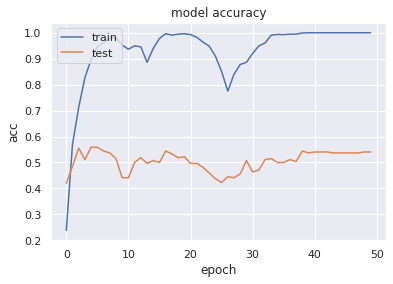

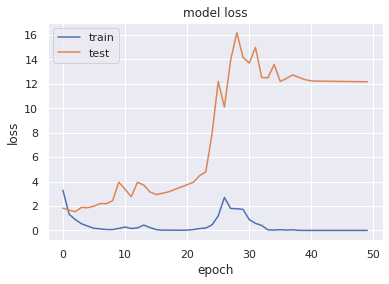

In [49]:
# List all data in history

print(data.history.keys())

# summarize history for accuracy
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# summarize history for loss
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [92]:
# Storing the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["NN Adam"], "Accuracy":round((acc_ad_mod[1] * 100), 2)}, index = {"3"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1      SVM      6.25
2      KNN     23.53
3  NN Adam     54.04

## **B. SGD Optimizer**

In [50]:
# Initialize Sequential model

model_sgd = Sequential()

# Input Layer

model_sgd.add(Dense(128, input_shape = (224,224,3), kernel_initializer = 'normal', activation = 'relu'))
model_sgd.add(Dropout(0.3))    # Adding dropout 0.3

# Adding two Hidden layers
model_sgd.add(Dense(100, activation='relu', kernel_initializer = 'normal'))    # 2nd layer
model_sgd.add(Dropout(0.2))    # Adding dropout 0.2
model_sgd.add(Dense(64, activation='relu', kernel_initializer = 'normal'))    # 3rd layer
model_sgd.add(Dropout(0.3))    # Adding dropout 0.3
model_sgd.add(Dense(32, activation='relu', kernel_initializer = 'normal'))    # 4th layer
model_sgd.add(Dropout(0.3))    # Adding dropout 0.2

# Flattening layer
model_sgd.add(Flatten())       

#Output layer
model_sgd.add(Dense(17, activation='softmax', kernel_initializer = 'normal'))

# Adding SGD optimizer
sgd_opt = optimizers.SGD(lr = 0.001)
model_sgd.compile(optimizer = sgd_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [51]:
model_sgd.summary()        # Getting model summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 224, 224, 128)     512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 224, 224, 128)     0         
_________________________________________________________________
dense_12 (Dense)             (None, 224, 224, 100)     12900     
_________________________________________________________________
dropout_12 (Dropout)         (None, 224, 224, 100)     0         
_________________________________________________________________
dense_13 (Dense)             (None, 224, 224, 64)      6464      
_________________________________________________________________
dropout_13 (Dropout)         (None, 224, 224, 64)      0         
_________________________________________________________________
dense_14 (Dense)             (None, 224, 224, 32)     

In [52]:
# Fitting the model

callback1 = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2, min_delta = 0.001)

data1 = model_sgd.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), batch_size = 32, verbose = 1, callbacks = [callback1])

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 2.8401 - acc: 0.0653

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 18s 17ms/sample - loss: 2.8401 - acc: 0.0653 - val_loss: 2.8291 - val_acc: 0.0809
Epoch 2/50
1088/1088 [==============================] - 18s 17ms/sample - loss: 2.8366 - acc: 0.0588 - val_loss: 2.8370 - val_acc: 0.0551
Epoch 3/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.8352 - acc: 0.0671 - val_loss: 2.8333 - val_acc: 0.0368
Epoch 4/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.8336 - acc: 0.0588 - val_loss: 2.8350 - val_acc: 0.0625
Epoch 5/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.8338 - acc: 0.0533 - val_loss: 2.8332 - val_acc: 0.0515
Epoch 6/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.8341 - acc: 0.0634 - val_loss: 2.8334 - val_acc: 0.0368
Epoch 7/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.8328 - acc: 0.0708 - val_loss: 2.8335 - val_acc: 0.0625
Epoch 8/50
1088/1088 [=======================

In [53]:
model_sgd.evaluate(x_train, y_train)       # Training score

[2.83002971200382, 0.060661763]

In [54]:
acc_sgd_mod = model_sgd.evaluate(x_test, y_test)         # Testing score

In [55]:
# PREDICTIONS

y_pd = model_sgd.predict(x_test)
y_c = np.argmax(y_pd, axis = 1) 
y_ck = np.argmax(y_test, axis = 1) 

mat1 = confusion_matrix(y_ck, y_c)
print(mat1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 11]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 18]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0 20]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 14]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0 22]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


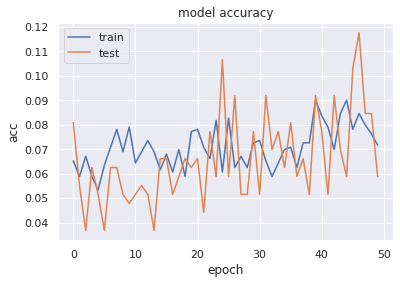

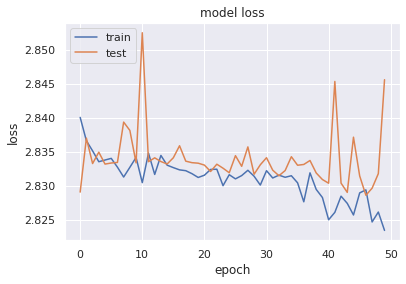

In [57]:
# List all data in history

print(data1.history.keys())

# summarize history for accuracy
plt.plot(data1.history['acc'])
plt.plot(data1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# summarize history for loss
plt.plot(data1.history['loss'])
plt.plot(data1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [93]:
# Storing the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["NN SGD"], "Accuracy":round((acc_sgd_mod[1] * 100), 2)}, index = {"4"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1      SVM      6.25
2      KNN     23.53
3  NN Adam     54.04
4   NN SGD      5.88

## **CNN Model Building**

In [61]:
# Initializing the CNN classifier
mod_cnn = Sequential()

mod_cnn.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (224,224,3)))   # Adding convolutional layer with 64 kernels of size 3x3
mod_cnn.add(MaxPooling2D((2, 2), padding = 'same'))     # Adding maxpooling layer 
mod_cnn.add(BatchNormalization())      # Adding batch normalization

mod_cnn.add(Conv2D(filters = 512, kernel_size = 4, padding = 'same', activation = 'relu'))      # Adding convolutional layer with 128 kernels of size 3x3
mod_cnn.add(MaxPooling2D((3, 3), padding = 'same'))     # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout of 0.4

mod_cnn.add(Conv2D(filters = 256, kernel_size = 4, padding = 'same', activation = 'relu'))      # Adding convolutional layer with 256 kernels of size 3x3
mod_cnn.add(MaxPooling2D((2, 2), padding = 'same'))     # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization

mod_cnn.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3x3
mod_cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout of 0.4

mod_cnn.add(Conv2D(filters = 100, kernel_size = 2, padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3x3
mod_cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization

mod_cnn.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))       # Adding convolutional layer with 64 kernels of size 3x3
mod_cnn.add(MaxPooling2D((2, 2), padding='same'))       # Adding maxpooling layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout of 0.4

mod_cnn.add(Flatten())     # Adding flattening layer
mod_cnn.add(Dense(100, activation = 'relu'))        # Adding fully connected layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout 0.4
mod_cnn.add(Dense(50, activation = 'relu'))         # Adding fully connected layer
mod_cnn.add(BatchNormalization())      # Adding batch normalization
mod_cnn.add(Dropout(0.4))        # Adding dropout 0.4

mod_cnn.add(Dense(17, activation = 'softmax'))      # Output layer

In [62]:
mod_cnn.summary()      # Getting model summary

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 512)     1049088   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 512)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 38, 38, 512)       2048      
_________________________________________________________________
dropout_15 (Dropout)         (None, 38, 38, 512)      

In [63]:
# Compling the model

rms_opt = optimizers.RMSprop(lr = 0.001)
mod_cnn.compile(optimizer = rms_opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [64]:
# Fitting the model

callback2 = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2, min_delta = 0.001)

data2 = mod_cnn.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test), batch_size = 50, verbose = 1, callbacks = [callback2                                                                                                                                    ])

Train on 1088 samples, validate on 272 samples
Epoch 1/150
1088/1088 [==============================] - ETA: 0s - loss: 3.5113 - acc: 0.0956

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 48s 44ms/sample - loss: 3.5113 - acc: 0.0956 - val_loss: 2.9150 - val_acc: 0.0551
Epoch 2/150
1088/1088 [==============================] - 21s 20ms/sample - loss: 3.0826 - acc: 0.1425 - val_loss: 3.0743 - val_acc: 0.0588
Epoch 3/150
1088/1088 [==============================] - 21s 19ms/sample - loss: 2.7662 - acc: 0.1746 - val_loss: 3.1079 - val_acc: 0.0588
Epoch 4/150
1088/1088 [==============================] - 21s 20ms/sample - loss: 2.6910 - acc: 0.1903 - val_loss: 2.8783 - val_acc: 0.0662
Epoch 5/150
1088/1088 [==============================] - 21s 20ms/sample - loss: 2.5101 - acc: 0.2142 - val_loss: 2.7888 - val_acc: 0.0735
Epoch 6/150
1088/1088 [==============================] - 21s 20ms/sample - loss: 2.2760 - acc: 0.2619 - val_loss: 2.8869 - val_acc: 0.0735
Epoch 7/150
1088/1088 [==============================] - 21s 19ms/sample - loss: 2.2186 - acc: 0.2629 - val_loss: 2.9345 - val_acc: 0.1140
Epoch 8/150
1088/1088 [================

In [65]:
mod_cnn.evaluate(x_train, y_train)       # Training score

[0.03267527162354193, 0.99264705]

In [66]:
acc_cnn_mod = mod_cnn.evaluate(x_test, y_test)         # Testing score

In [67]:
# PREDICTIONS

ypd = mod_cnn.predict(x_test)
ycl = np.argmax(ypd, axis = 1) 
ych = np.argmax(y_test, axis = 1) 

mat2 = confusion_matrix(ych, ycl)
print(mat2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[ 6  0  0  6  1  0  3  0  0  0  0  0  0  0  1  0  0]
 [ 0 11  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  3  0  7  0  0  0  0  0  0  0  0  5  0  1]
 [ 0  0  0  6  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 20  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  1  0  9  1  1  0  0  2  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  1  0  0 12  0  0  0  1  0]
 [ 1  0  0  1  0  0  0  0  0  0  2  2  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0]
 [ 0  0  1  4  0  1  0  0  0  0  0  0  0  1 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


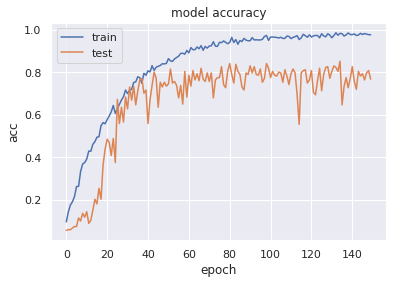

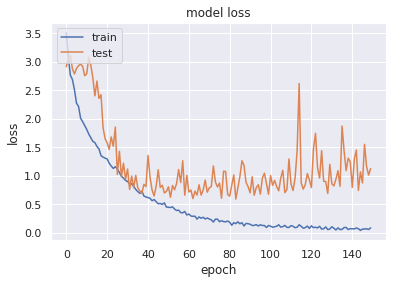

In [68]:
# List all data in history

print(data2.history.keys())

# summarize history for accuracy
plt.plot(data2.history['acc'])
plt.plot(data2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# summarize history for loss
plt.plot(data2.history['loss'])
plt.plot(data2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [94]:
# Store the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["CNN"], "Accuracy":round((acc_cnn_mod[1] * 100), 2)}, index = {"5"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1      SVM      6.25
2      KNN     23.53
3  NN Adam     54.04
4   NN SGD      5.88
5      CNN     76.84

# **Tranfer Learning Model Building**

## **VGG16 Model Building**

In [71]:
from tensorflow.keras.applications.vgg16 import VGG16

model_vgg = VGG16 (weights = 'imagenet', include_top = False, input_shape = (224, 224, 3), pooling = 'avg')

# Freeze all the layers except for the last layer: 
for layer in model_vgg.layers[:-4]:
    layer.trainable = False
 
# Create the model
mod_vgg = Sequential()
 
# Add the vgg convolutional base model
mod_vgg.add(model_vgg)
 
# Add new layers
mod_vgg.add(Flatten())
mod_vgg.add(Dense(1024, activation='relu'))
mod_vgg.add(Dropout(0.5))
mod_vgg.add(Dense(17, activation='softmax'))

# Summary of VGG16 model along with few dense layers on top of it
mod_vgg.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 17)                17425     
Total params: 15,257,425
Trainable params: 5,262,353
Non-trainable params: 9,995,072
_________________________________________________________________


In [73]:
# Compiling model

from keras.optimizers import RMSprop

mod_vgg.compile(loss='categorical_crossentropy',
                        optimizer = RMSprop(lr = 0.0001), # Keeping learning rate low
                        metrics = ['accuracy'])

In [74]:
# Image augmentation for train set and image resizing for validation

image_datagen = ImageDataGenerator ( # this function will generate augmented images in real time
      rescale = 1./255,
      rotation_range = 20,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      horizontal_flip=True)

In [75]:
# Start training using data augumentation generator

data3 = mod_vgg.fit_generator(image_datagen.flow(x_train*255, y_train, batch_size = 16),
                                        steps_per_epoch = len(x_train)/16, validation_data = (x_test, y_test), epochs = 30 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/30
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.2656 - acc: 0.2932

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


68/68 [==============================] - 16s 178ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.2656 - acc: 0.2932 - val_loss: 1.6007 - val_acc: 0.4743
Epoch 2/30
68/68 [==============================] - 13s 186ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.2818 - acc: 0.6066 - val_loss: 0.8721 - val_acc: 0.7500
Epoch 3/30
68/68 [==============================] - 13s 187ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.8658 - acc: 0.7344 - val_loss: 0.5942 - val_acc: 0.8346
Epoch 4/30
68/68 [==============================] - 13s 186ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.6113 - acc: 0.8134 - val_loss: 0.4784 - val_acc: 0.8750
Epoch 5/30
68/68 [==============================] - 13s 186ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.5047 - acc: 0.8447 - val_loss: 0.4768 - val_acc: 0.8566
Epoch 6/30
68/68 [==============================] - 13s 188ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.3877 - acc: 0.8888 - val_loss: 0.3456 - val_acc: 0.8897
Epoch 7/30
68/6

In [95]:
# Store the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["VGG16"], "Accuracy":round(((data3.history['val_acc'])[-1] * 100), 2)}, index = {"6"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1      SVM      6.25
2      KNN     23.53
3  NN Adam     54.04
4   NN SGD      5.88
5      CNN     76.84
6    VGG16     90.81

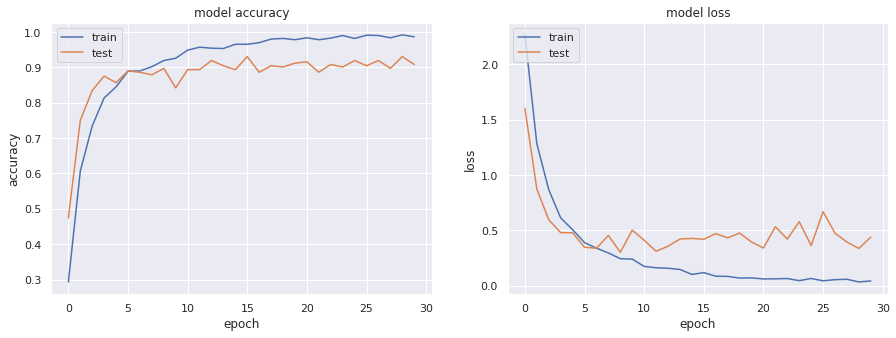

In [77]:
#Plot Loss and Accuracy

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(data3.history['acc'])
plt.plot(data3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(data3.history['loss'])
plt.plot(data3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **ResNet Model Building**



In [78]:
from keras.applications import ResNet50

# Load the ResNet model
model_res = ResNet50(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in model_res.layers[:-4]:
    layer.trainable = False
 
# Create the model
mod_res = Sequential()
 
# Add the vgg convolutional base model
mod_res.add(model_res)
 
# Add new layers
mod_res.add(Flatten())
mod_res.add(Dense(1024, activation='relu'))
mod_res.add(Dropout(0.5))
mod_res.add(Dense(17, activation='softmax'))

mod_res.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              102761472 
_________________________________________________________________
dropout_21 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 17)                17425     
Total params: 126,366,609
Trainable params: 103,833,617
Non-trainable params: 22,532,992
_________________________________________________________________


In [79]:
# Compiling the model

mod_res.compile(loss='categorical_crossentropy',
                     optimizer = RMSprop(lr = 0.0001), # Keeping learning rate low
                     metrics = ['accuracy'])

In [80]:
# Image augmentation for train set and image resizing for validation

image_datagen_res = ImageDataGenerator ( # this function will generate augmented images in real time
      rescale = 1./255,
      rotation_range = 20,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      horizontal_flip=True)

In [81]:
# Start training using data augumentation generator

data4 = mod_res.fit_generator(image_datagen_res.flow(x_train*255, y_train, batch_size = 16),
                                        steps_per_epoch = len(x_train)/16, validation_data = (x_test, y_test), epochs = 30 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/30
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 4.6038 - acc: 0.4559

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


68/68 [==============================] - 18s 210ms/step - batch: 33.5000 - size: 16.0000 - loss: 4.6038 - acc: 0.4559 - val_loss: 3.9472 - val_acc: 0.0441
Epoch 2/30
68/68 [==============================] - 13s 197ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.4563 - acc: 0.7178 - val_loss: 4.4683 - val_acc: 0.0441
Epoch 3/30
68/68 [==============================] - 14s 205ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.1059 - acc: 0.7647 - val_loss: 6.0331 - val_acc: 0.0515
Epoch 4/30
68/68 [==============================] - 14s 205ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.9222 - acc: 0.8208 - val_loss: 6.0255 - val_acc: 0.0404
Epoch 5/30
68/68 [==============================] - 14s 206ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.8599 - acc: 0.8419 - val_loss: 5.4874 - val_acc: 0.0441
Epoch 6/30
68/68 [==============================] - 14s 203ms/step - batch: 33.5000 - size: 16.0000 - loss: 0.6831 - acc: 0.8722 - val_loss: 7.2819 - val_acc: 0.0441
Epoch 7/30
68/6

In [96]:
# Store the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["ResNet"], "Accuracy":round(((data4.history['val_acc'])[-1] * 100), 2)}, index = {"7"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1      SVM      6.25
2      KNN     23.53
3  NN Adam     54.04
4   NN SGD      5.88
5      CNN     76.84
6    VGG16     90.81
7   ResNet      4.41

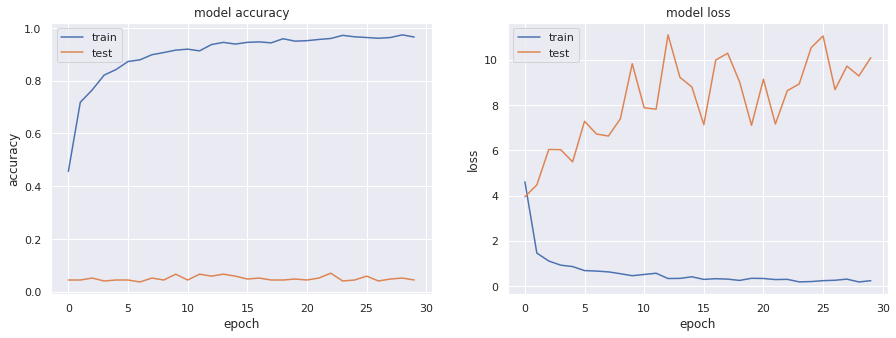

In [83]:
# Plot Loss and Accuracy

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(data4.history['acc'])
plt.plot(data4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(data4.history['loss'])
plt.plot(data4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **GoogleNet Model Building**

In [84]:
from keras.applications import InceptionV3

# Load the ResNet model
model_goo = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in model_goo.layers[:-4]:
    layer.trainable = False
 
# Create the model
mod_goo = Sequential()
 
# Add the vgg convolutional base model
mod_goo .add(model_goo)
 
# Add new layers
mod_goo.add(Flatten())
mod_goo.add(Dense(1024, activation='relu'))
mod_goo.add(Dropout(0.5))
mod_goo.add(Dense(17, activation='softmax'))

mod_goo.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              52429824  
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 17)                17425     
Total params: 74,250,033
Trainable params: 52,447,249
Non-trainable params: 21,802,784
_________________________________________________________________


In [85]:
# Compiling the model

mod_goo.compile(loss='categorical_crossentropy',
                     optimizer = RMSprop(lr = 0.0001), # Keeping learning rate low
                     metrics = ['accuracy'])

In [86]:
# Image augmentation for train set and image resizing for validation

image_datagen_goo = ImageDataGenerator ( # this function will generate augmented images in real time
      rescale = 1./255,
      rotation_range = 20,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      horizontal_flip=True)

In [87]:
# Start training using data augumentation generator

data5 = mod_goo.fit_generator(image_datagen_goo.flow(x_train*255, y_train, batch_size = 16),
                                        steps_per_epoch = len(x_train)/16, validation_data = (x_test, y_test), epochs = 30 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/30
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 4.0047 - acc: 0.2693

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


68/68 [==============================] - 18s 204ms/step - batch: 33.5000 - size: 16.0000 - loss: 4.0047 - acc: 0.2693 - val_loss: 2.6889 - val_acc: 0.3456
Epoch 2/30
68/68 [==============================] - 12s 172ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.7704 - acc: 0.4881 - val_loss: 2.1162 - val_acc: 0.4632
Epoch 3/30
68/68 [==============================] - 13s 191ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.4078 - acc: 0.5965 - val_loss: 2.6625 - val_acc: 0.4301
Epoch 4/30
68/68 [==============================] - 13s 191ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.1409 - acc: 0.6673 - val_loss: 2.7389 - val_acc: 0.5147
Epoch 5/30
68/68 [==============================] - 13s 190ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.1353 - acc: 0.6756 - val_loss: 2.2800 - val_acc: 0.5147
Epoch 6/30
68/68 [==============================] - 13s 189ms/step - batch: 33.5000 - size: 16.0000 - loss: 1.0066 - acc: 0.7059 - val_loss: 2.2738 - val_acc: 0.5662
Epoch 7/30
68/6

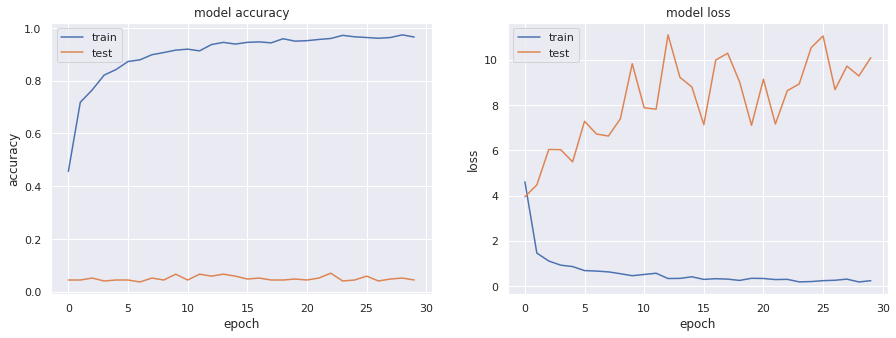

In [ ]:
# Plot Loss and Accuracy

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(data5.history['acc'])
plt.plot(data5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(data5.history['loss'])
plt.plot(data5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
# Store the accuracy results for each model in a dataframe for final comparison

results_df = pd.DataFrame({"Method":["GoogleNet"], "Accuracy":round(((data5.history['val_acc'])[-1] * 100), 2)}, index = {"7"})
results = pd.concat([results, results_df])
results = results[["Method", "Accuracy"]]
results

Method  Accuracy
1        SVM      6.25
2        KNN     23.53
3    NN Adam     54.04
4     NN SGD      5.88
5        CNN     76.84
6      VGG16     90.81
7     ResNet      4.41
7  GoogleNet     53.68

We can observe from the above analysis of Supervised Learning, Artificial Neural Network (ANN), Convolutional Neural Networks (CNN)and Transfer Learning, that "VGG16 Model" has given highet  test accuracy of 90.81%.

In [260]:
# Save the CNN Model and its weights after training
mod_vgg.save(path + "Flowers Dataset.h5")
mod_vgg.save_weights(path + "Flowers Dataset weights.h5")

# **GUI Building**

In [261]:
# Set the version of tensorflow
%tensorflow_version 2.x

In [262]:
# Import Tkinter library

from tkinter import *
from tensorflow.keras.models import load_model
import numpy as np
import cv2

import skimage.io as io

# Globally declare the image variable 
image = "" 

In [ ]:
# Click function for Import Data Button
def imp_data():
    imp_data_txt.delete(0,END)
    try:       
        # Point out the global image variable 
        global image
        image_file = file_txt.get()    

        # Import the data        
        image = io.imread(image_file)
        image_file = "Imported Successfully!"
    except:
        image_file = "Sorry!!"
        file_txt.delete(0,END)
    imp_data_txt.insert(END, image_file)
    
# Click function for Predict Button
def predict():
    img_cls_txt.delete(0,END)
    try:
        # Point out the global image variable 
        global image
        
        if image != "":
            # Load the pre-trained model
            pretrained_model = load_model("Flowers Dataset.h5")
            pretrained_model.load_weights("Flowers Dataset weights.h5")
            
            # Resize the image to 224x224 shape to be compatible with the model
            image = cv2.resize(image, (224, 224))
 
            # If not compatible expand the dimensions to match with the model
            image = np.expand_dims(image, axis = 0)
            image = image * 1/224.0
 
            result = pretrained_model.predict(image)
    
            cls_text = np.argmax(result)
        else:
            cls_text = "Not Found!"
    except:
        cls_text = "Error!"
        img_cls_txt.delete(0,END)
    img_cls_txt.insert(END, cls_text)
    
# Driver code 
if __name__ == "__main__":
    # create a GUI window 
    gui = Tk()
    
    # set the background colour of GUI window 
    gui.configure(background="light gray") 
 
    # set the title of GUI window 
    gui.title("CLASSIFIER GUI") 
 
    # set the configuration of GUI window 
    gui.geometry("800x250") 
    
    # Label for Step 1: File Name
    stp1_lbl = Label(gui, text = "Step 1: File Name")
    stp1_lbl.grid(row = 1, column = 0, padx = 10, pady = 10, sticky = W)
  
    # StringVar() is the variable class 
    # we create an instance of this class    
    file_val = StringVar()
    # Textbox for Source File
    file_txt = Entry(gui, textvariable=file_val, width=30)
    file_txt.grid(row = 1, column = 1, pady = 10, sticky = W)

    # Button for Import Data
    import_data_btn = Button(gui, text = "Import Data", width = 10, command = imp_data)
    import_data_btn.grid(row = 1, column = 2, padx = 50, pady = 10, sticky = W)
    
    # Textbox for Action Result of Import Data Button
    imp_data_txt = Entry(gui, width=30)
    imp_data_txt.grid(row = 1, column = 3, pady = 10, sticky = W)
    
    # Label for Image Class
    img_cls_lbl = Label(gui, text = "Image Class/Label:")
    img_cls_lbl.grid(row = 2, column = 0, padx = 10, pady = 10, sticky = W)
    
    # Textbox for Image Class
    img_cls_txt = Entry(gui, width=30)
    img_cls_txt.grid(row = 2, column = 1, pady = 10, sticky = W)
    
    # Button for Predict
    import_data_btn = Button(gui, text = "Prediction", width = 10, command = prediction)
    import_data_btn.grid(row = 3, column = 1, padx = 50, pady = 10, sticky = W)
    
    # start the GUI 
    gui.mainloop() 

## **V]. PART FIVE // STRATEGY**

Maintaining the AIML image classifier after it is in production is very important. That would help to check whether the model is performing to the best of its abilities. And also the model degrades over time due to the following reasons:
- Unseen Data
- Changes in environment and relationships between variables
- Upstream data changes

So inorder to maintain the performance of the model in production, the following needs to be performed regularly either once in a year or once in 6 months:
1. Retrain the model so as to adjust the weights 
2. Build an alternative model which can improve the accuracy along with less mean error.